### Import libraries

In [3]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
source("helperFunctions.R")
source("visualizeGMMLibrary.R")

### Set the sample

In [4]:
sample_list <- c("hT30") # Set the sample that you want to view the GMM for here.

### Display GMM for mclust model V, minjoin = 0.25

Here, we are running the GMM model using the mclust model "V", which is fitting Gaussian components without any restriction of equal mean or (especially) variance. In the plot below, we can see obvious errors in the clustering where clear overlapping is occuring between cluster components, which is rational that this behaviour should not occur within the context of segments.

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

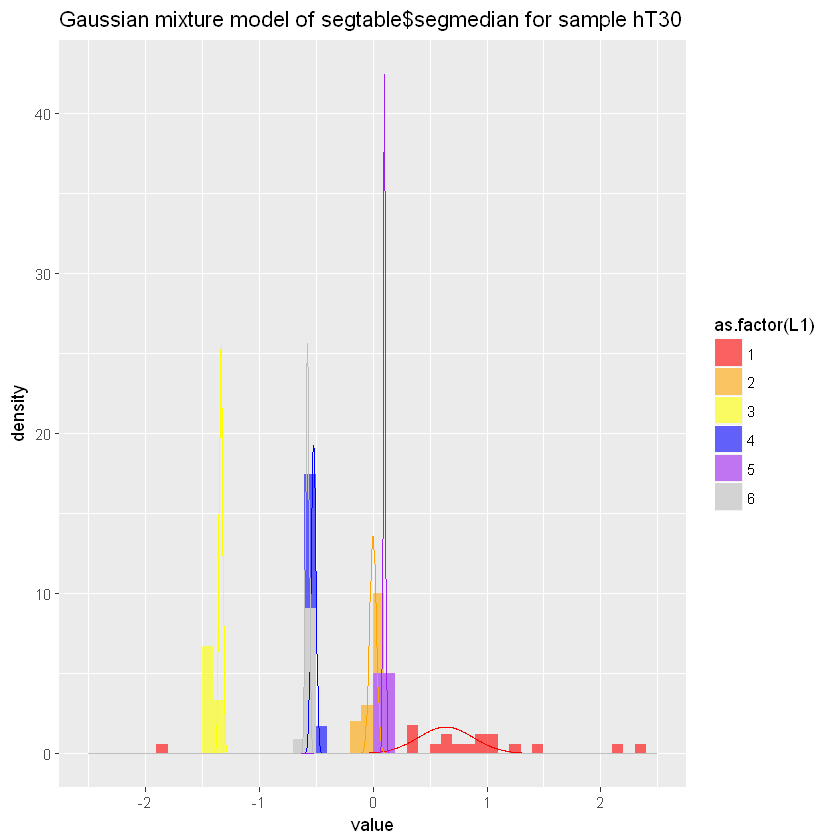

In [5]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_V <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run3/")
    displayGMM(segtable = segtable_mclust_V, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 0.25

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

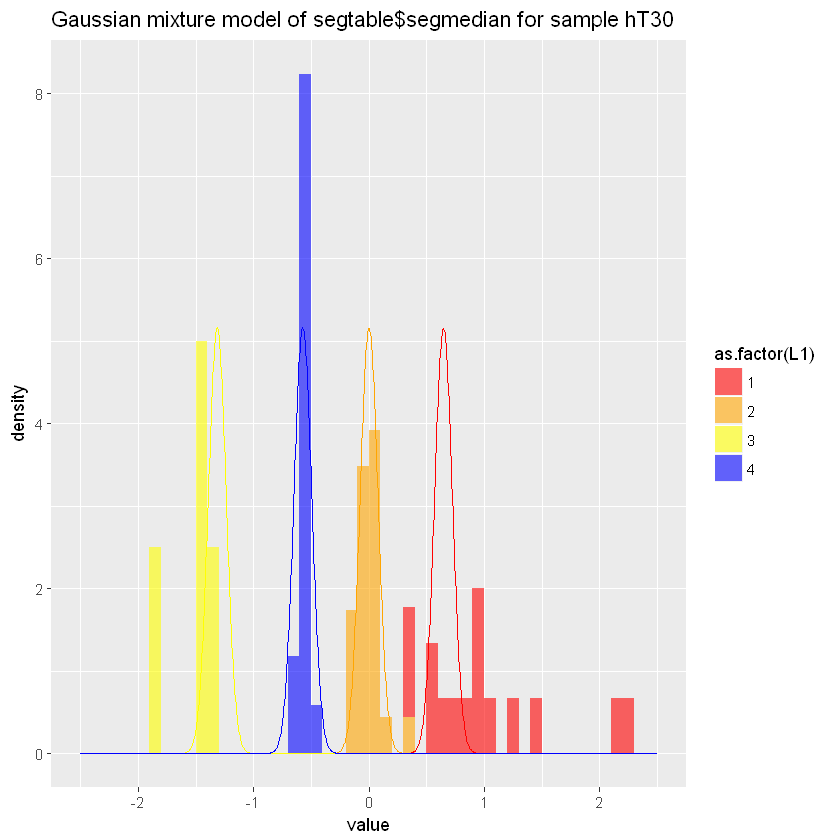

In [17]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_E <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run1/")
    displayGMM(segtable = segtable_mclust_E, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model V, minjoin = 0.05

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

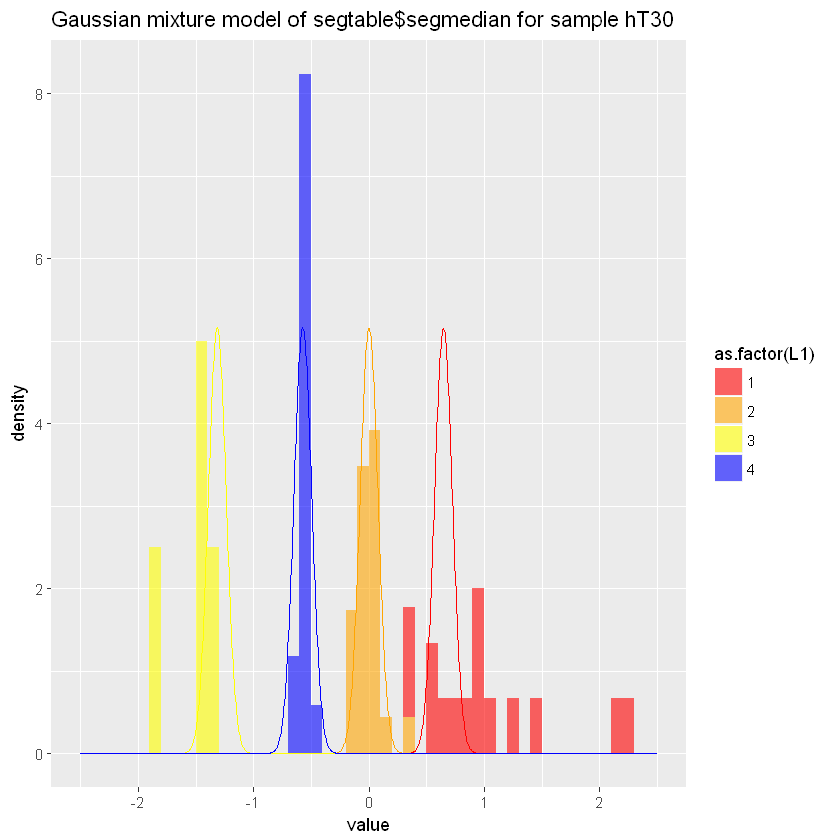

In [18]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_V_minJoin_05 <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_2/")
    displayGMM(segtable = segtable_mclust_E, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 0.05

In [15]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_E_minJoin_05 <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_3/")
    displayGMM(segtable = segtable_mclust_E, sample = sample, print = TRUE, save = FALSE)
}

ERROR: Error in displayGMM(segtable = segtable_mclust_E, sample = sample, print = TRUE, : object 'segtable_mclust_E' not found


### Display GMM for mclust model E, minjoin = 0.25, ntrial = 40

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

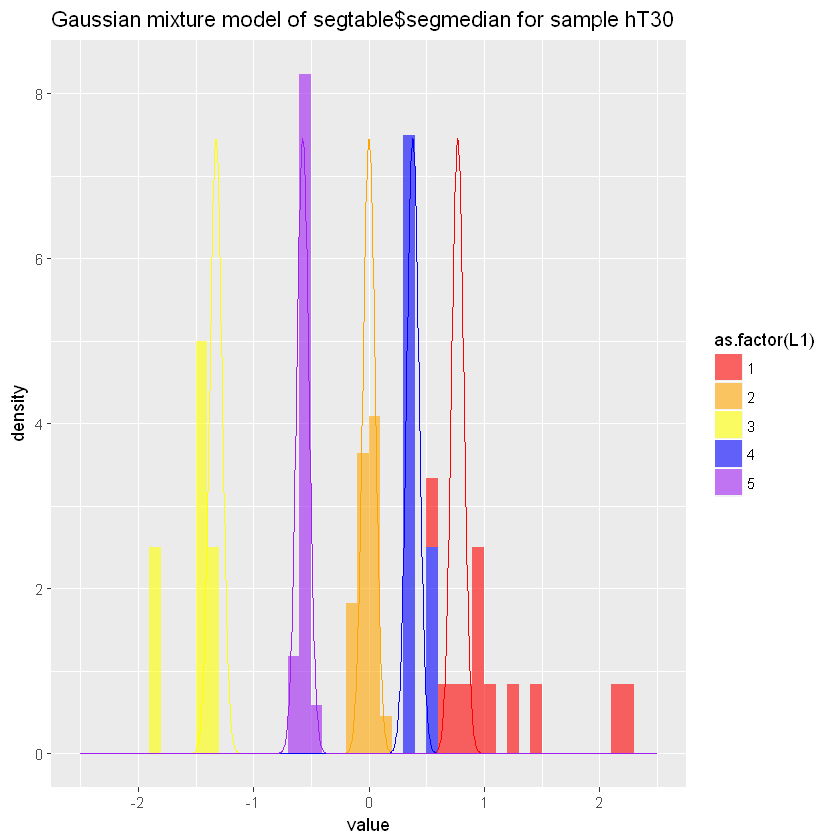

In [17]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_14/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 0.25, ntrial = 10

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

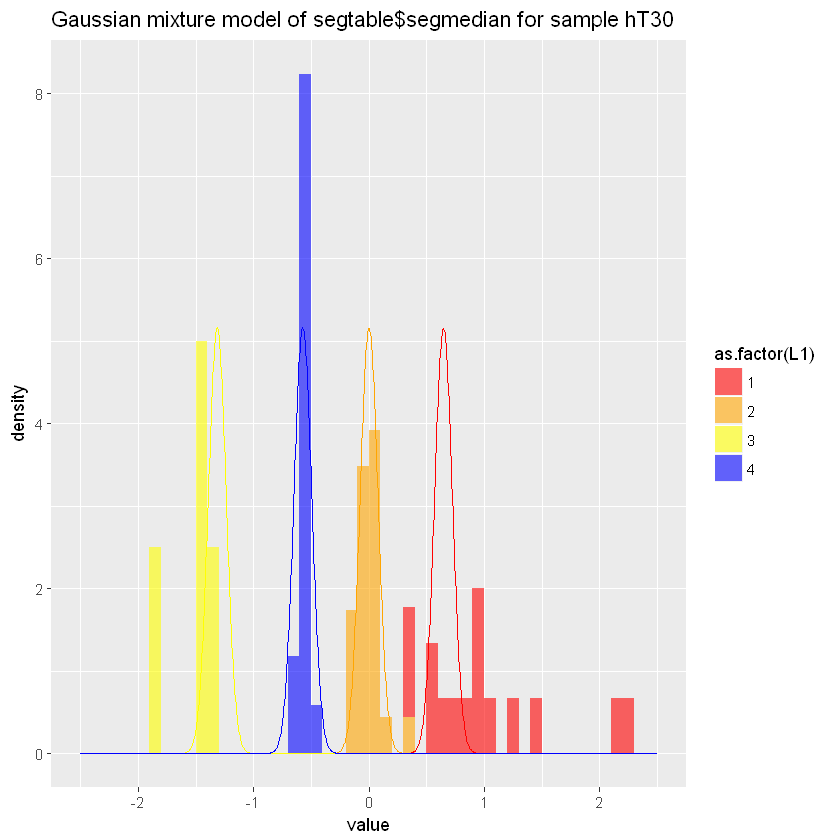

In [18]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_15/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model V, minjoin = 0.25, ntrial = 10

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

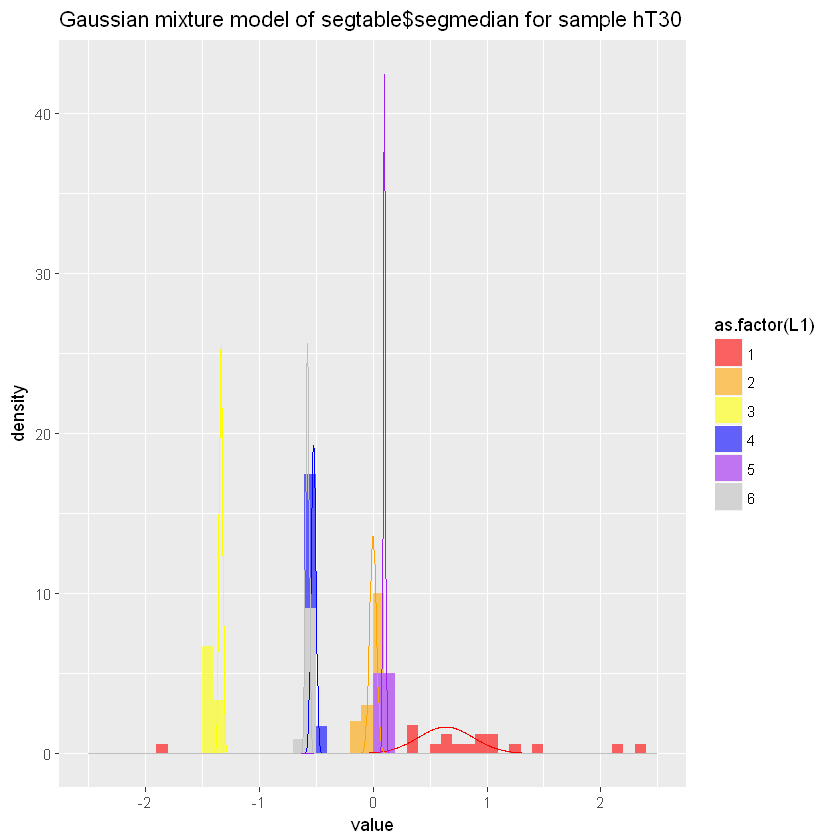

In [20]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_16/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 0.01, ntrial = 10

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

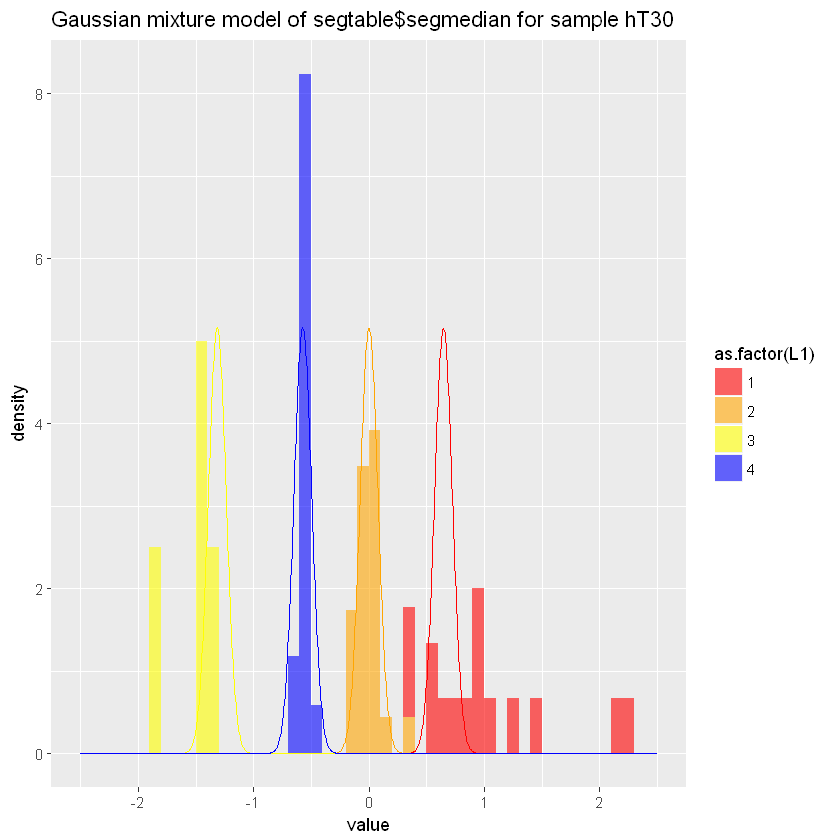

In [21]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_17/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model V, minjoin = 0.01, ntrial = 10

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

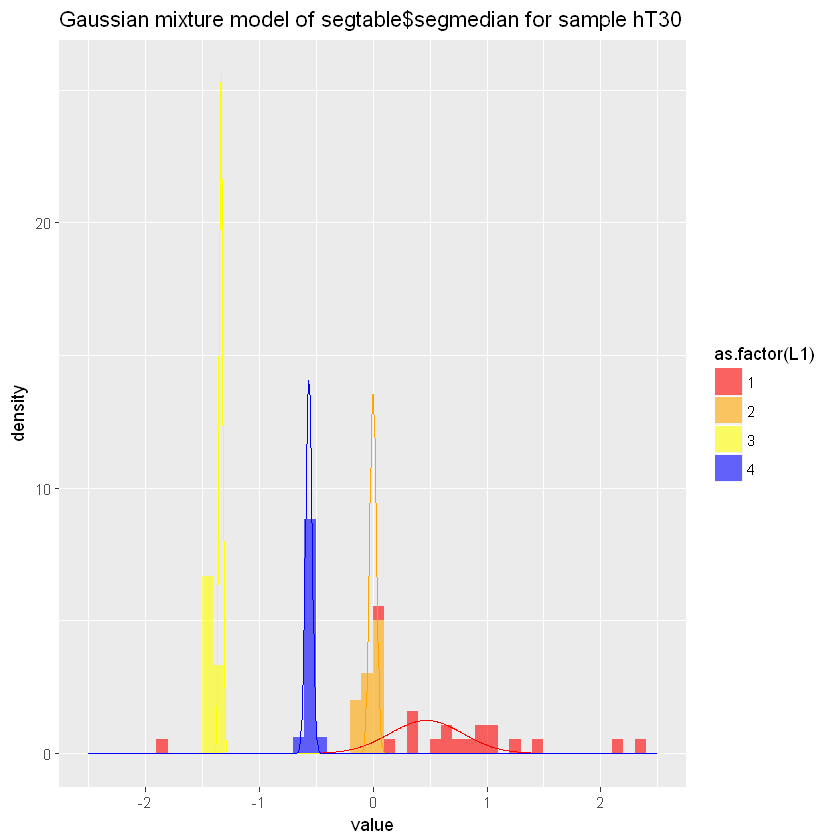

In [23]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_18/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 0.01, ntrial = 50

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

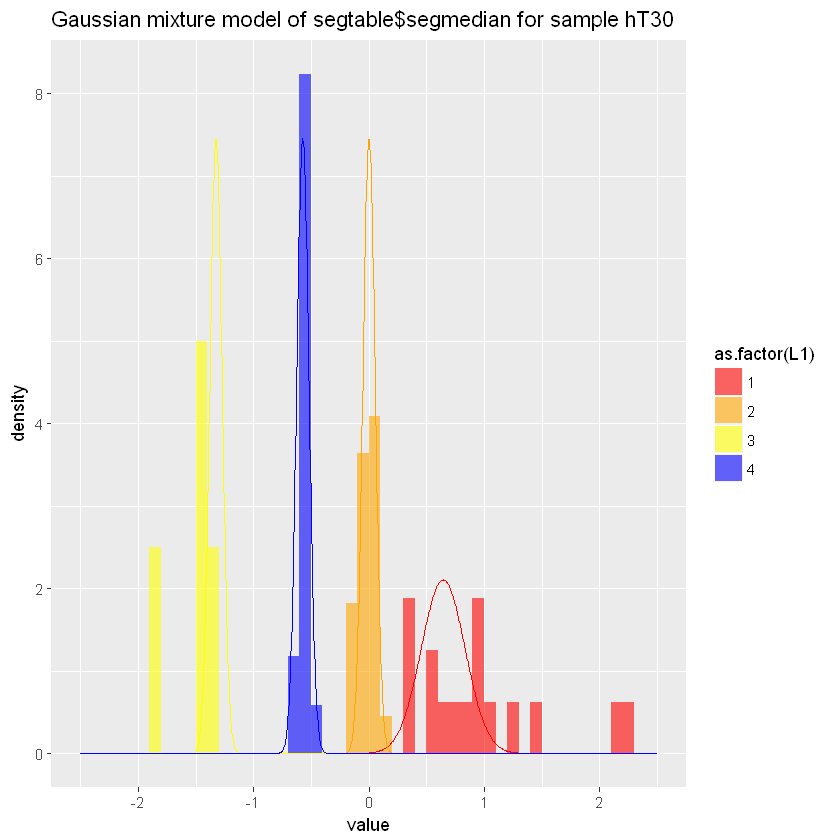

In [24]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_19/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model V, minjoin = 0.01, ntrial = 50

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

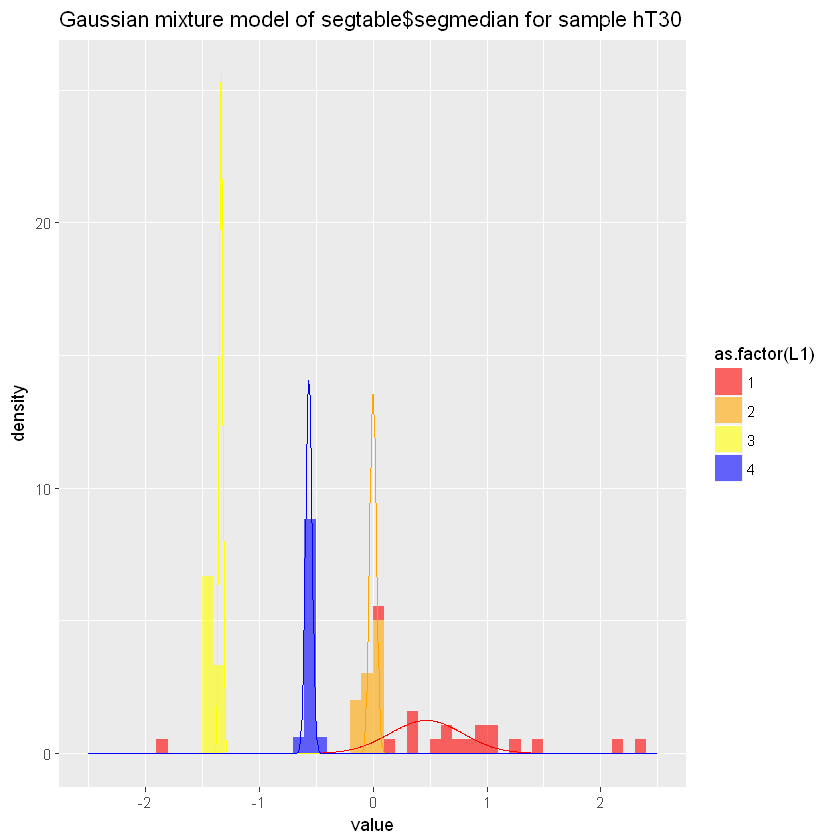

In [14]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_15_2018_20/")
    displayGMM(segtable = segtable, sample = sample, print = TRUE, save = FALSE)
}